In [1]:
from typing import List
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from sklearn.gaussian_process import kernels
from sklearn.gaussian_process import GaussianProcessRegressor




/Users/h_nagino/work/github/Leaning_Gaussian_kernel/.venv/lib/python3.14/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/h_nagino/work/github/Leaning_Gaussian_kernel/.venv/lib/python3.14/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/h_nagino/work/github/Leaning_Gaussian_kernel/.venv/lib/python3.14/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k2__k2__length_scale is close to the specified upper bo

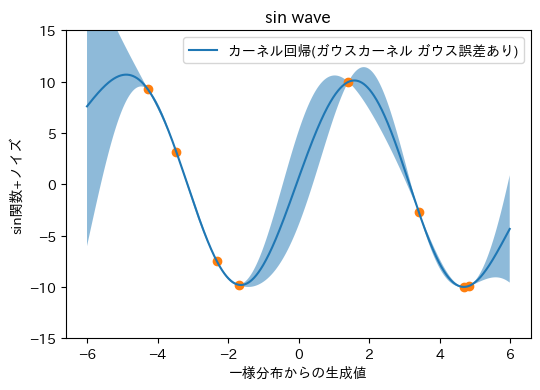

In [2]:
def wave_dataset(size:int, xlim:List=[0, 1], scale:float|None=None) -> pd.DataFrame:
    x = np.random.uniform(xlim[0], xlim[1], size)
    y = 10*np.sin(x)
    if scale is not None:
        noize = np.random.normal(0, scale, size)
        y = y + noize
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    return df

train_num  = 8
train_data = wave_dataset(train_num, xlim=[-5, 5], scale=0.1)
X_axis     = np.arange(-6, 6, 0.01)

model = GaussianProcessRegressor(
					kernel=(kernels.ConstantKernel()   * kernels.DotProduct()
							+ kernels.ConstantKernel() * kernels.Matern(nu=0.5)
							+ kernels.ConstantKernel() * kernels.ExpSineSquared()
							+ kernels.ConstantKernel() * kernels.RBF()
							+ kernels.ConstantKernel() * kernels.WhiteKernel()), 
					alpha=0, random_state=0)
model.fit(train_data['x'].values.reshape((-1, 1)), train_data['y'].values.reshape((-1, 1)))

pred_mu_ss, pred_sigma_ss = model.predict(X_axis.reshape((-1, 1)), return_std=True)

# データを描画
plt.figure(figsize=(6, 4))
plt.plot(X_axis, pred_mu_ss, label='カーネル回帰(ガウスカーネル ガウス誤差あり)')
plt.fill_between(X_axis, pred_mu_ss - 3*pred_sigma_ss, pred_mu_ss + 3*pred_sigma_ss, alpha=0.5)
plt.scatter(train_data['x'].values, train_data['y'].values, marker='o')
plt.title('sin wave')
plt.xlabel('一様分布からの生成値')
plt.ylabel('sin関数+ノイズ')
plt.ylim((-1.5*10, 1.5*10))
plt.legend()
plt.show()